In [32]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

import meep as mp
from meep import mpb

import sys, os
sys.path.append('../../../jupyter-meep-libs')
sys.path.append('..')
from meep_nb import *
from partial_wgs import *

%config InlineBackend.figure_format = 'retina'
from matplotlib.backends.backend_pdf import PdfPages
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(224, 160)

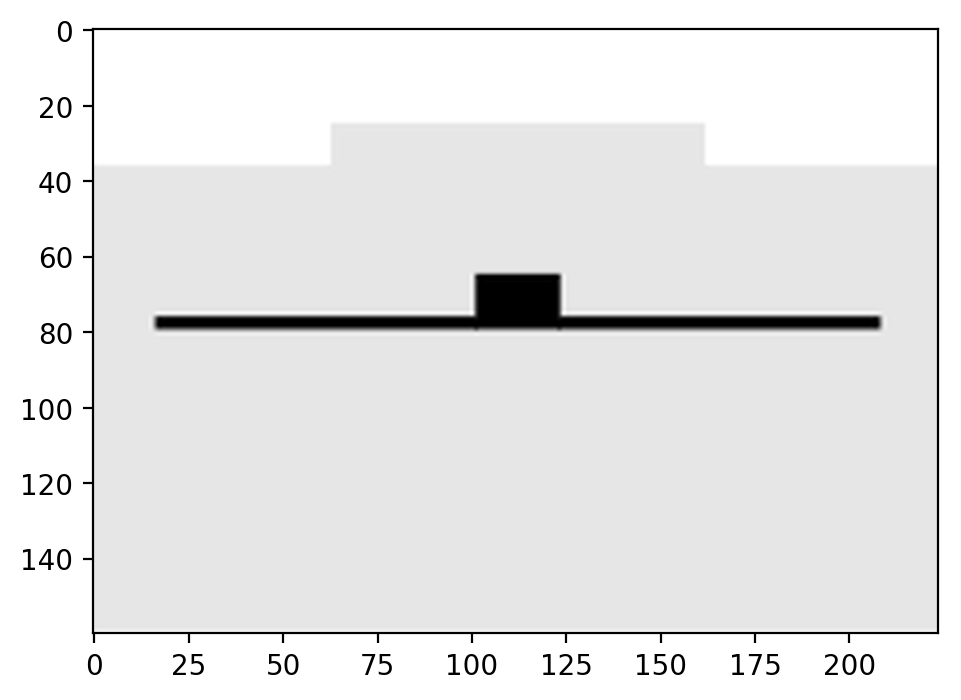

In [33]:
ms = get_ms(geom=get_xs(.35, two_wg_gap=None, encapsulation=.6))
ms.init_params(mp.NO_PARITY, reset_fields=True)
show_geometry(ms, periods=1).shape

## Compute k values over some variable. Pick one

In [137]:
kmat = []

wids = np.linspace(0.1, .5, 11)
for wid in wids:
    ks = get_ks(xs=get_xs(wid, two_wg_gap=None, encapsulation=.6), freq=1/1.198, num_bands=1)
    kmat.append(ks)
    print('\nW={:.3f}\n'.format(wid))
xvar = wids
    
# gaps = np.linspace(.1, 2, 11)
# for gap in gaps:
#     ks = get_ks(xs=get_xs(two_wg_gap=gap), freq=1/1.218, num_bands=4)
#     kmat.append(ks)
#     print('\nW={:.3f}\n'.format(gap))
# xvar = gaps

Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
1 k-points
  Vector3<2.8797996661101837, 0.0, 0.0>
elapsed time for initialization: 0.05297207832336426
elapsed time for k point: 0.3341391086578369
total elapsed time for run: 0.38736581802368164
done
find-k 1 at 2.8797996661101837: 0.43121249287064223
Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
1 k-points
  Vector3<0.08347245409015025, 0.0, 0.0>
elapsed time for initialization: 0.045291900634765625
elapsed time for k point: 0.10597705841064453
total elapsed time for run: 0.15193915367126465
done
find-k 1 at 0.08347245409015025: -0.7764920519750261
Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
1 k-points
  Vector3<3.33889816360601, 0.0, 0.0>
elapsed time for initialization: 0.04249691963195801
elapsed time for k point: 0.3292551040649414
total elapsed time for run: 0.37192606925964355
done
find-k 1 at 3.33889816360601: 0.5682119949670232
Initializing eigensolver data
Co

elapsed time for k point: 0.24432897567749023
total elapsed time for run: 0.2963738441467285
done
find-k 1 at 3.33889816360601: 0.33728474994148216
Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
1 k-points
  Vector3<2.001624681300315, 0.0, 0.0>
elapsed time for initialization: 0.04531121253967285
elapsed time for k point: 0.2427070140838623
total elapsed time for run: 0.28824806213378906
done
find-k 1 at 2.001624681300315: 0.0007399910483566474
Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
1 k-points
  Vector3<1.9987006819369229, 0.0, 0.0>
elapsed time for initialization: 0.04597306251525879
elapsed time for k point: 0.2196180820465088
total elapsed time for run: 0.26685285568237305
done
find-k 1 at 1.9987006819369229: -6.009041941812399e-08
yoddkvals:, 0.8347245409015025, 1, 1, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.9987009193337542

W=0.260

Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
1 k-points
  Vector3<2.87979966611018

find-k 1 at 0.08347245409015025: -0.7771523638572881
Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
1 k-points
  Vector3<3.33889816360601, 0.0, 0.0>
elapsed time for initialization: 0.04134488105773926
elapsed time for k point: 0.21894407272338867
total elapsed time for run: 0.26067399978637695
done
find-k 1 at 3.33889816360601: 0.2649899476024906
Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
1 k-points
  Vector3<2.3326266641350646, 0.0, 0.0>
elapsed time for initialization: 0.038752079010009766
elapsed time for k point: 0.18724989891052246
total elapsed time for run: 0.22619009017944336
done
find-k 1 at 2.3326266641350646: 0.0010797539671050238
Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
1 k-points
  Vector3<2.3284518534114556, 0.0, 0.0>
elapsed time for initialization: 0.039069175720214844
elapsed time for k point: 0.21394991874694824
total elapsed time for run: 0.25317811965942383
done
find-k 1 at 2.32845185341145

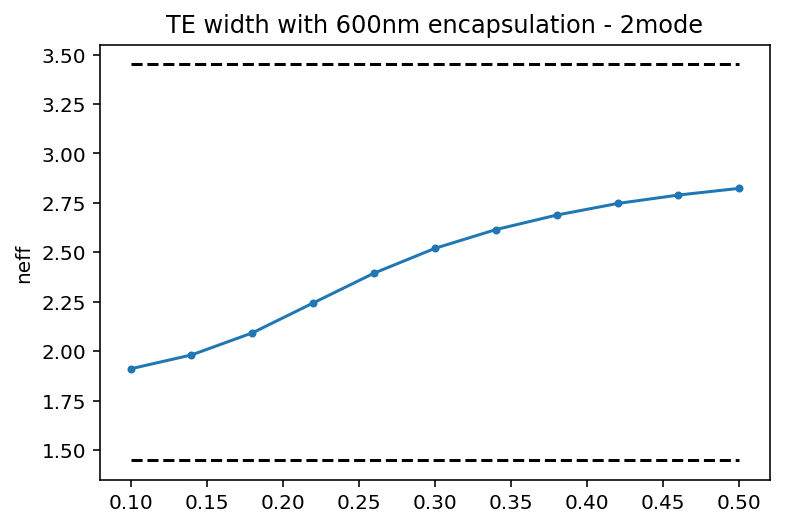

In [139]:
karr = np.array(kmat)
neffs = karr * 1.198

# plt.plot(wids, karr, '.-')
# plt.plot([wids[0], wids[-1]], [cutoff_k(1/1.218)]*2, '--k')

plt.plot(xvar, neffs, '.-')
plt.plot([xvar[0], xvar[-1]], [[3.45, 1.45]]*2, '--k')
plt.ylabel('neff')
plt.title('TE width with 600nm encapsulation - 2mode')

if False:
    with PdfPages('encapsulated_wgs.pdf') as pdf:
        pdf.savefig()

## Make a bragg grating

In [140]:
# For 1D calculations
from lightlab.util.data import MeasuredFunction
mf = MeasuredFunction(wids, neffs[:,0])


def bragg_bandgap(na, nb, center=1):
    # center can be frequency or wavelength
    # center=1 means it is fractional
    return np.arcsin(np.abs(na - nb) / (na + nb)) * center

def bragg_reflection(na, nb, num_periods):
    na_exp = na ** (2 * num_periods)
    nb_exp = nb ** (2 * num_periods)
    return ((na_exp - nb_exp) / (na_exp + nb_exp)) ** 2

In [143]:
wl = 1.198  # desired
sm_wg = 0.350
dn = .15
Nper = 20

# Fudge factors for blurring
wl_fudge = 20e-3
bw_fudge = 0.3


# get index for the input waveguide
print('Center wavelength', wl + wl_fudge)
nwg = mf(sm_wg)
print('SM neff', nwg)

# calculate the two WG widths and lengths (duty is assumed 0.5)
n1 = nwg + dn/2
n2 = nwg - dn/2
print('wid1', mf.invert(n1))
print('wid2', mf.invert(n2))
print('period', wl/2/nwg)

# bandgap
print('Bandwidth', bragg_bandgap(n1, n2, wl) *1e3 * bw_fudge, 'nm')

# some reflections
for per in [1, 5, 10, 20, 40, 60, 80, 100]:
    print('Reflection:', per, '=', bragg_reflection(n1, n2, per))


# print(mf(.350))

# get the width for this neff
# dn = .16
# print(mf.invert(mf(.350) - dn/2))

Center wavelength 1.218
SM neff 2.6330549750805576
wid1 0.3935405592013707
wid2 0.31611383398739396
period 0.2274924016661193
Bandwidth 10.238542882587343 nm
Reflection: 1 = 0.003240098623924174
Reflection: 5 = 0.07697851636653763
Reflection: 10 = 0.26546999873783883
Reflection: 20 = 0.6630888603973408
Reflection: 40 = 0.9589607106113069
Reflection: 60 = 0.9957202655931882
Reflection: 80 = 0.9995611175518281
Reflection: 100 = 0.999955070699305


## Imperfections
Bandwidth is going to be less in experiment due to blurred corrugations

Center wavelength will also be red shifted

See https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6324162

In [122]:
# (1190nm, 2nm) ---
# w1w2 = 359, 341
# per = 220
# # (1190nm, 20nm) ---
w1w2 = 462, 286
per = 220
# (1190nm, 2nm) ---
# w1w2 = 357, 343
# per = 246
# # (1190nm, 20nm) ---
# w1w2 = 431, 295
# per = 246
# # (1220nm, 2nm) ---
# w1w2 = 357, 343
# per = 234
# # (1220nm, 20nm) ---
# w1w2 = 437, 293
# per = 234

mw = np.sum(w1w2)/2
dw = np.diff(w1w2)
print(mw,',',dw)

# Notes:
# All the 2nm bandwidths have a mean width of 350nm
# 14-18 dw

# 20nm bandwidths are between 363-365nm for the mean
# dw is strongly dependent 144-176

374.0 , [-176]
